Dataset Location-
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

# Problem Statement and Project Objective 

Exaplin the problem statement. Business Problem and Objective clearly. Background Goal, Number of Resources, Business Impact, Time Taken





*   **Business Problem**- In simple language it can be stated as a problem that the customers tent to go through the reviews before buying any product rather than looking for it's features given by the manufacturer.So the reviews also play a major role in todays world.
*   **Objective**- Building a predictive model using the amazon-review so that it can be tested on further reviews. The whole project will done through NLP sentiment analysis using spaCY package.
*  **NO of resources**- 10
*   **Time taken** - 2 weeks





# **Extraction and loading of the dataset**

In [1]:
#packages required to import data from goole drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import seaborn as sns


In [2]:
g_drive_file_id="1zZKW9SJcv6QgOoydkyi97kCzoMekuSbY"

In [3]:
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)
downloaded=drive.CreateFile({'id':g_drive_file_id})
downloaded.GetContentFile('Reviews.csv')

In [4]:
#Getting the test data from the goggle drive to work with. All the package needed for the whole step was feeded to the model in the step 1 itself.
reviews_data=pd.read_csv("/content/Reviews.csv")

# Data Exploration and Validation


In [5]:
#Getting a rough idea of the data
reviews_data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
#Checking the datatypes of each column
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
#Checking of any null or missing values in the dataset
reviews_data.isnull().sum()
#Upon checking of the null data it was found that the null data was less than 0.5%.
#So dropping of the datas would not impact much upon the accuracy of the model.


Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
#Dropping of the null data
reviews_data.dropna(inplace=True)
reviews_data.shape

(568411, 10)

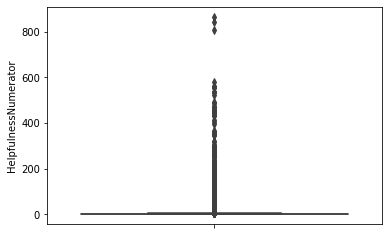

In [9]:
# HelpfulnessNumerator exploration
sns.boxplot(y=reviews_data['HelpfulnessNumerator'])
#From the box plot it is evident that it has some outlier

In [10]:
#Checking the quantile function to get the exact percentage of the outlier and latter cleaning it up.
reviews_data['HelpfulnessNumerator'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.98,0.99,0.995,1])
#5% of the data can be considered as outlier without and further drilling into the data.

0.000      0.0
0.100      0.0
0.200      0.0
0.300      0.0
0.400      0.0
0.500      0.0
0.600      1.0
0.700      1.0
0.800      2.0
0.900      4.0
0.910      4.0
0.920      5.0
0.930      5.0
0.940      6.0
0.950      7.0
0.960      8.0
0.980     12.0
0.990     19.0
0.995     30.0
1.000    866.0
Name: HelpfulnessNumerator, dtype: float64

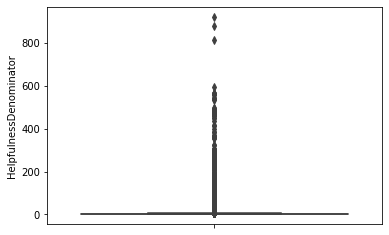

In [11]:
# HelpfulnessNumerator exploration
sns.boxplot(y=reviews_data['HelpfulnessDenominator'])
#From the box plot it is evident that it has some outlier

In [12]:
#Checking the quantile function to get the exact percentage of the outlier and latter cleaning it up.
reviews_data['HelpfulnessDenominator'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.98,0.99,0.995,1])
#5% of the data can be considered as outlier without and further drilling into the data.

0.000      0.0
0.100      0.0
0.200      0.0
0.300      0.0
0.400      0.0
0.500      1.0
0.600      1.0
0.700      2.0
0.800      3.0
0.900      5.0
0.910      6.0
0.920      6.0
0.930      7.0
0.940      8.0
0.950      9.0
0.960     10.0
0.980     16.0
0.990     23.0
0.995     35.0
1.000    923.0
Name: HelpfulnessDenominator, dtype: float64

Data Exploration Steps for all the variables. Write down your findings after every variable exploration

# Data Cleaning and Data Preparation

## **Score Variable exploration and cleaning**

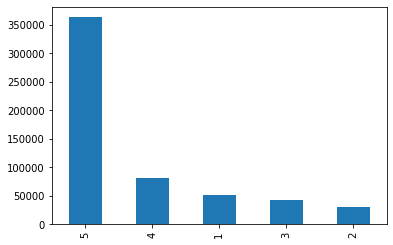

In [13]:
#Getting the count of each star rating and representing it in a bar plot
#for better visualization. Most of the rating were given 5 and 4 star.
ax=reviews_data.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score.png");

In [14]:
#Treating anything above 4 as positive and below 4 as negative.
#Encoding positive reviews as 1 and negative as 0. Only 1 and 0 are to be used for better accuracy in model building.
reviews_data.loc[reviews_data.Score<=3,'Score']=0
reviews_data.loc[reviews_data.Score>=4,'Score']=1

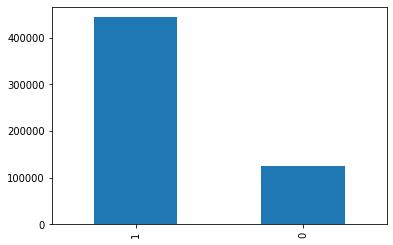

In [15]:
ax=reviews_data.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score_boolean.png");
#Looked liked the data set is not quite balanced as the number of positive reviews are more.(We will take care of that in further steps using SMOTE)

In [16]:
# Label Encoding the Review Score to positive and Negative
reviews_data['Score']=reviews_data['Score'].map({1:"Positive",0:"Negative"}).astype(str)

## **HelpfullnessNumerator Cleaning**

In [17]:
# Cleaning the Outlier by imputing it with the median value of the whole cloumn data
reviews_data.loc[reviews_data['HelpfulnessNumerator']>30,'HelpfulnessNumerator']=reviews_data['HelpfulnessNumerator'].median()

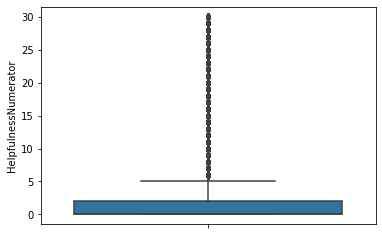

In [18]:
sns.boxplot(y=reviews_data['HelpfulnessNumerator'])

**HelpfullnessDenominator Cleaning**

In [19]:
# Cleaning the Outlier by imputing it with the median value of the whole cloumn data
reviews_data.loc[reviews_data['HelpfulnessDenominator']>35,'HelpfulnessDenominator']=reviews_data['HelpfulnessDenominator'].median()

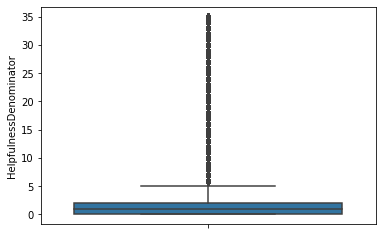

In [20]:
sns.boxplot(y=reviews_data['HelpfulnessDenominator'])

# **Text Data Preprocessing**

In [21]:
# Importing Packages for performing NLP 
import nltk
import spacy
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [22]:
#Since the dataset is very huge, to avoid any complication let us break down the data set into limited shape
#and then train the model. For better accuracy we have taken equal number of Positive and Negative data.
#Also only the Text and Score column was kept as these two are only required for Naive Baise model building
reviews_data_two = reviews_data[['Text','Score']]
reviews_data_positive=reviews_data_two[reviews_data_two.Score=='Positive'][:8000]
reviews_data_negative=reviews_data_two[reviews_data_two.Score=='Negative'][:8000]

In [23]:
# Concatenating the positive and negative datasets
reviews_data_conc=pd.concat([reviews_data_positive,reviews_data_negative],axis=0)
reviews_data_conc.shape

(16000, 2)

## Preprocessing functions

In [24]:
contra_Expan_Dict = {"ain`t": "am not","aren`t": "are not","can`t": "cannot","can`t`ve": "cannot have","`cause": "because",
"could`ve": "could have","couldn`t": "could not","couldn`t`ve": "could not have","didn`t": "did not",
"doesn`t": "does not","don`t": "do not","hadn`t": "had not","hadn`t`ve": "had not have","hasn`t": "has not",
"haven`t": "have not","he`d": "he would","he`d`ve": "he would have","he`ll": "he will","he`ll`ve": "he will have",
"he`s": "he is","how`d": "how did","how`d`y": "how do you","how`ll": "how will",
"how`s": "how does","i`d": "i would","i`d`ve": "i would have","i`ll": "i will","i`ll`ve": "i will have","i`m": "i am",
"i`ve": "i have","isn`t": "is not","it`d": "it would","it`d`ve": "it would have","it`ll": "it will","it`ll`ve": "it will have",
"it`s": "it is","let`s": "let us","ma`am": "madam","mayn`t": "may not","might`ve": "might have","mightn`t": "might not",
"mightn`t`ve": "might not have","must`ve": "must have","mustn`t": "must not","mustn`t`ve": "must not have","needn`t": "need not","needn`t`ve": "need not have",
"o`clock": "of the clock","oughtn`t": "ought not","oughtn`t`ve": "ought not have","shan`t": "shall not",
"sha`n`t": "shall not","shan`t`ve": "shall not have","she`d": "she would",
"she`d`ve": "she would have","she`ll": "she will","she`ll`ve": "she will have",
"she`s": "she is","should`ve": "should have","shouldn`t": "should not","shouldn`t`ve": "should not have","so`ve": "so have","so`s": "so is",
"that`d": "that would","that`d`ve": "that would have","that`s": "that is","there`d": "there would","there`d`ve": "there would have","there`s": "there is",
"they`d": "they would","they`d`ve": "they would have","they`ll": "they will","they`ll`ve": "they will have","they`re": "they are","they`ve": "they have",
"to`ve": "to have","wasn`t": "was not"," u ": " you "," ur ": " your "," n ": " and ","won`t": "would not",
"dis": "this","bak": "back","brng": "bring"}

def expanded_form(x):
  if x in contra_Expan_Dict.keys():
    return(contra_Expan_Dict[x])
  else:
    return(x)

from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do"})

import re
def clean_with_re(x):
  x=str(x)
  x=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ", x) #Remove URLs
  x=re.sub(r'[^\w ]+', "", x) # Remove Punctuation-1
  x=re.sub(r"[,!@&\'?\.$%_]"," ", x) # Remove Punctuation-2
  x=re.sub(r"\d+"," ", x) #Remove digits
  return(x)

spacy_model = spacy.load('en_core_web_sm')

def pre_processing(input_data, text_col):
  input_data["text_col_clean"]=input_data[text_col].apply(lambda x:str(x).lower())
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:clean_with_re(x))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x: " ".join(x) )
  print(input_data[[text_col,"text_col_clean"]])

In [25]:
pre_processing(input_data=reviews_data_conc, text_col="Text")

                                                    Text  \
0      I have bought several of the Vitality canned d...   
2      This is a confection that has been around a fe...   
4      Great taffy at a great price.  There was a wid...   
5      I got a wild hair for taffy and ordered this f...   
6      This saltwater taffy had great flavors and was...   
...                                                  ...   
34933  This jerky tastes okay, but it seems like this...   
34934  While "Wild Ride Beef Jerky Cowboy Strips" do ...   
34936  Not as good as some of the other beef jerky br...   
34937  This Jerky is close, but not quite as good as ...   
34938  like others i read the "great" reviews and thi...   

                                          text_col_clean  
0      buy vitality dog food product find good qualit...  
2      confection century light pillowy citrus gelati...  
4      great taffy great price wide assortment yummy ...  
5      wild hair taffy order pound bag taff

### Word Cloud (Optional Step)



*   Word Cloud would show us the pictoral view of the word which has appeared most number of times in the dataset. Also it would give these words in different orientation as many times it is run
  



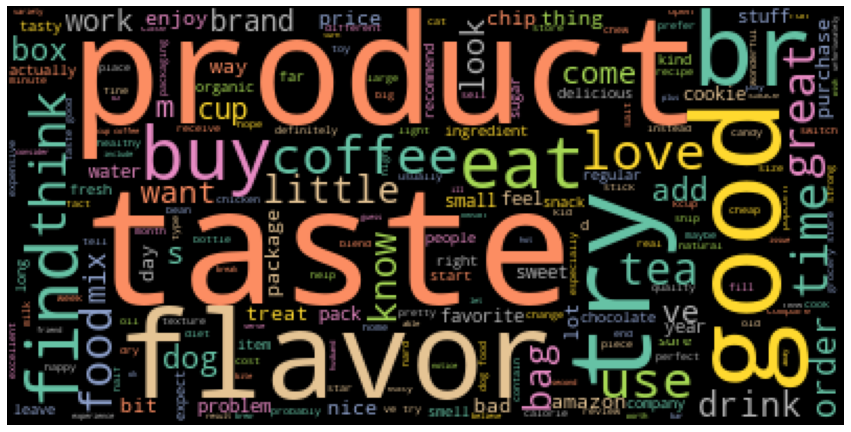

In [26]:
# Creating a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

final_text="".join(reviews_data_conc['text_col_clean'])

plt.figure(figsize = (15, 15), facecolor = None) 
wc=WordCloud(colormap='Set2').generate(final_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

## Document Term Matrix

In [27]:
# Importing the package for count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df=3) #minimum word freq=3 for excluding the rare appering words in the whole corpus.
dtm1 = pd.DataFrame(countvec1.fit_transform(reviews_data_conc['text_col_clean']).toarray(), columns=countvec1.get_feature_names_out(), index=None)
dtm1

,aa,abandon,abbott,abdominal,ability,able,aboutbr,abr,absence,absent,...,zinc,zing,zip,ziploc,ziplock,zipper,zippy,zojirushi,zucchini,zuke
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15996,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building Naive Bayes **Model**

In [28]:
# Storing the Score data in DTM for using the data in model building.
dtm1['Score']=reviews_data_conc['Score']

dtm1.dropna(inplace=True)

X=dtm1.drop('Score',axis=1)
y=dtm1['Score']

#  Test Train split of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=45)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9346, 8823)
(9346,)
(2337, 8823)
(2337,)


In [29]:
# Importing MultinomialNB from sklearn package
from sklearn.naive_bayes import MultinomialNB

sentiment_model=MultinomialNB()

sentiment_model.fit(X_train,y_train)

# Prediction on train and test data
pred_train=sentiment_model.predict(X_train)
pred_test=sentiment_model.predict(X_test)

## Model Validation
Confusion Matrix , Accuracy ,Specificity and Sensitivity

In [30]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_train,pred_train)
print(cm1,"\n")

cm=confusion_matrix(y_test,pred_test)
print(cm,"\n")

print("Train Accuracy", round(sentiment_model.score(X_train,y_train)*100,2))
print("Test Accuracy", round(sentiment_model.score(X_test,y_test)*100,2))

# Calculating Sensitivity
Sensitivity=cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity-',round(Specificity*100,2))

[[1556 1412]
 [ 526 5852]] 

[[ 221  494]
 [ 277 1345]] 

Train Accuracy 79.26
Test Accuracy 67.01
Sensitivity- 52.43
Specificity- 91.75




*   The ovefitting of the model is happening due to class imbalance. Let us use the SMOTE technique now to get over it.




# **SMOTE Technique**

In [31]:
# Handling Class Imbalance using SMOTE Technique
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.8,random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X,y)

import collections
print("Before_Smote",collections.Counter(y))
print("After_Smote",collections.Counter(y_train_smote))

Before_Smote Counter({'Positive': 8000, 'Negative': 3683})
After_Smote Counter({'Positive': 8000, 'Negative': 6400})


In [32]:
# Concatenating for getting the balance dataset
reviews_smote=pd.concat([X_train_smote,y_train_smote],axis=1)

## Updated Sensitivity and Specificity

In [33]:
from sklearn.model_selection import train_test_split

X=reviews_smote.drop('Score',axis=1)
y=reviews_smote['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5 , random_state=35)

from sklearn.naive_bayes import MultinomialNB

sentiment_model=MultinomialNB()

sentiment_model.fit(X_train,y_train)

pred_train=sentiment_model.predict(X_train)
pred_test=sentiment_model.predict(X_test)

In [34]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_train,pred_train)
print(cm1,"\n")

cm=confusion_matrix(y_test,pred_test)
print(cm,"\n")

print("Train Accuracy", round(sentiment_model.score(X_train,y_train)*100,2))
print("Test Accuracy", round(sentiment_model.score(X_test,y_test)*100,2))

# Calculating Sensitivity
Sensitivity=cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity-',round(Specificity*100,2))

[[1843 1400]
 [ 533 3424]] 

[[1289 1868]
 [1045 2998]] 

Train Accuracy 73.15
Test Accuracy 59.54
Sensitivity- 56.83
Specificity- 86.53


The difference between the Train and Test data is quite more. But these kind of observations are accepted as the vocabulary of english is very large. So the text's in Train and Test data differs a lot.